Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [9]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

/tmp/ipykernel_21011/4189017937.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating the features & Target

In [10]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']
# ----------------------------------#

In [11]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
print(X_train)
#--------------------------------------#

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Model Training

Support Vector Machine Model

In [19]:
model = svm.SVC(kernel='linear')

In [20]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')





Model Evaluation

Accuracy Score

In [21]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [22]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [23]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [24]:
print('Accuracy score of test data : ', test_data_accuracy)
#--------------------------------------------------

Accuracy score of test data :  0.8717948717948718


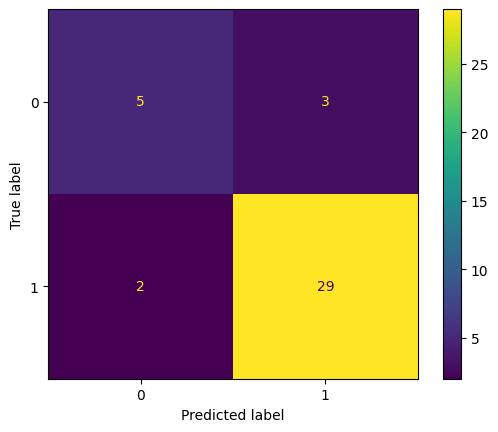

In [25]:
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.show()

Saving the model using pickle

In [26]:
import pickle
with open('model_svm.pkl','wb') as file:
    pickle.dump(model,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

Loading model using pickle

In [27]:
import pickle
with open('model_svm.pkl','rb') as file:
    model_svm = pickle.load(file)

Building a Predictive System

In [28]:
#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model_svm.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[1]
The Person has Parkinsons


/home/manav/Documents/Semester 6/DS Lab/venv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
len(input_data)

22

In [30]:
input_data_as_numpy_array.shape

(22,)

In [31]:
input_data_reshaped.shape

(1, 22)

# Trying logistic classifier

In [32]:
parkinsons_sys = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [33]:
X_test_prediction = parkinsons_sys.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.8205128205128205


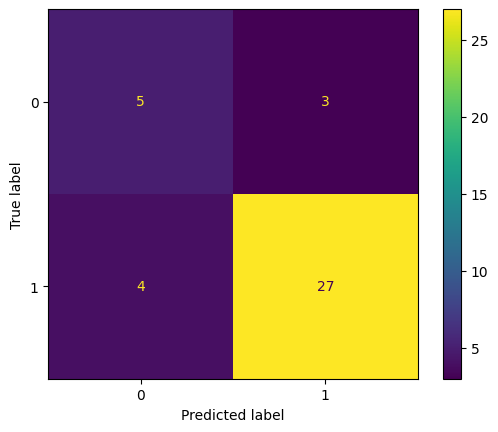

In [34]:
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(parkinsons_sys, X_test, Y_test)
plt.show()

# Trying kmeans

In [35]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_train, Y_train)

In [36]:
X_test_prediction = kmeans.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.2564102564102564


# Logistics after PCA

In [37]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(X_train)
X_test_PCA=pca.transform(X_test)
print(X_train.shape)
print(X_PCA.shape)
print(X_test_PCA.shape)

(156, 22)
(156, 8)
(39, 8)


In [38]:
parkinsons_sys_pca = LogisticRegression(random_state=0).fit(X_PCA, Y_train)

In [39]:
X_test_prediction = parkinsons_sys_pca.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.7435897435897436


# SVM after PCA

In [40]:
svm_pca_model = svm.SVC(kernel='linear')
svm_pca_model.fit(X_PCA, Y_train)

SVC(kernel='linear')

In [41]:
X_test_prediction = svm_pca_model.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.8205128205128205


# kmeans after PCA

In [42]:
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_PCA, Y_train)

In [43]:
X_test_prediction = kmeans_pca.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.2564102564102564


In [44]:
print(pca.components_)

[[-4.99074391e-02  1.52686263e-02 -6.27278183e-02  2.53613561e-01
   2.41623384e-01  2.49239024e-01  2.55272558e-01  2.49230085e-01
   2.59269043e-01  2.60671965e-01  2.52023165e-01  2.51772892e-01
   2.53406321e-01  2.52024237e-01  2.37087978e-01 -2.43108448e-01
   1.50299679e-01  2.62275390e-02  2.23212848e-01  1.52330396e-01
   1.63570906e-01  2.30345413e-01]
 [ 5.57881411e-01  3.48719473e-01  4.11375296e-01  1.01849473e-01
  -3.78215742e-02  1.37978144e-01  9.17165250e-02  1.38015760e-01
   3.17718522e-02  5.96170209e-02  4.01552368e-02  3.18923418e-02
   2.42464924e-02  4.01638645e-02  1.67514717e-01 -2.73604372e-02
  -2.65733389e-01 -2.92353300e-01 -2.34558068e-01 -2.08259563e-01
   7.94438959e-02 -2.01598220e-01]
 [ 1.65659998e-01  3.09342262e-01 -2.09182099e-01 -1.48728307e-01
  -1.95887416e-01 -1.63148690e-01 -1.68883627e-01 -1.63209570e-01
  -1.76469509e-02 -3.51004729e-02 -4.19248190e-02 -1.95378481e-02
   1.93371057e-02 -4.19408049e-02 -4.70099134e-02 -1.51531754e-01
   3.3

## Implementing Random Forest

In [45]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="log_loss")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=10)

In [46]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy) 

0.8974358974358975


In [47]:
avg = 0
for i in range(10):
    classifier= RandomForestClassifier(n_estimators= 10, criterion="log_loss")
    classifier.fit(X_train, Y_train)
    X_test_prediction = classifier.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
#     print (test_data_accuracy) 
    avg+=test_data_accuracy
print(avg/10)

0.8153846153846154


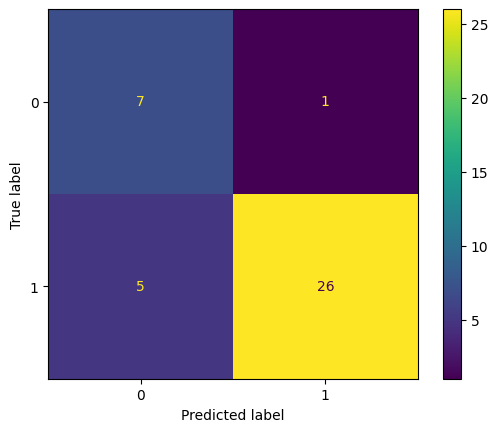

In [48]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test)
plt.show()


In [49]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print(precision)

0.9629629629629629


In [50]:
recall= cm[1][1] / (cm[1][1] + cm[1][0])
print(recall)

0.8387096774193549


Random Forest with PCA

In [51]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_PCA, Y_train)
X_test_prediction = classifier.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.7692307692307693


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Fitting Decision Tree Model on Data
decision_parkinson_classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
decision_parkinson_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [54]:
# Predicting Values on Test Set
Y_predicted = decision_parkinson_classifier.predict(X_test)

In [55]:
decision_accuracy = accuracy_score(Y_test, Y_predicted)
print(decision_accuracy)

0.8205128205128205


In [56]:
confusion_matrix(Y_test,Y_predicted)

array([[ 3,  5],
       [ 2, 29]])

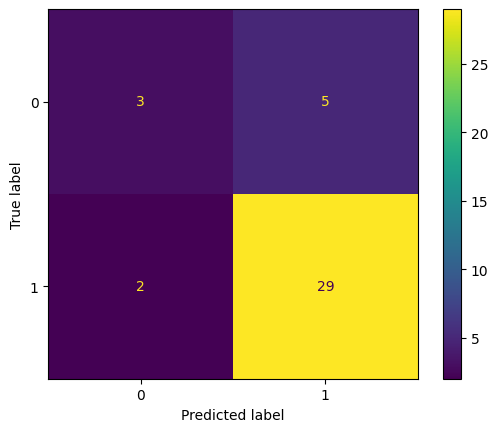

In [57]:
# cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(decision_parkinson_classifier, X_test, Y_test)
plt.show()

# Decision Tree after PCA

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
decision_parkinson_classifier_PCA = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
decision_parkinson_classifier_PCA.fit(X_PCA, Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [60]:
Y_predicted_PCA = decision_parkinson_classifier_PCA.predict(X_test_PCA)

In [61]:
decision_accuracy_PCA = accuracy_score(Y_test, Y_predicted_PCA)
print(decision_accuracy_PCA)

0.8461538461538461
